In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [3]:
from keras.layers import Dropout

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [4]:
# hyperparameters 
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.3,0.5,0.7,0.9]

In [5]:
# training with different dropout ratio

results = {} # for plotting later
for dp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ration = %.6f" % (dp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = dp_ratio)
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(dp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ration = 0.300000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 296us/step - loss: 2.1795 - acc: 0.1903 - val_loss: 1.9848 - val_acc: 0.3046
Epoch 2/30
50000/50000 [==============================] - 13s 270us/step - loss: 2.0019 - acc: 0.2680 - val_loss: 1.8623 - val_acc: 0.3464
Epoch 3/30
50000/50000 [==============================] - 13s 258us/step - loss: 1.9187 - acc: 0.3056 - val_loss: 1.7969 - val_acc: 0.3652
Epoch 4/30
50000/50000 [==============================] - 13s 264us/step - loss: 1.8695 - acc: 0.3255 - val_loss: 1.7603 - val_acc: 0.3810
Epoch 5/30
50000/50000 [==============================] - 13s 267us/step - loss: 1.8346 - acc: 0.3386 - val_loss: 1.7

50000/50000 [==============================] - 12s 231us/step - loss: 1.7599 - acc: 0.3676 - val_loss: 1.6329 - val_acc: 0.4256
Epoch 22/30
50000/50000 [==============================] - 12s 232us/step - loss: 1.7515 - acc: 0.3707 - val_loss: 1.6193 - val_acc: 0.4297
Epoch 23/30
50000/50000 [==============================] - 12s 236us/step - loss: 1.7420 - acc: 0.3725 - val_loss: 1.6088 - val_acc: 0.4318
Epoch 24/30
50000/50000 [==============================] - 12s 237us/step - loss: 1.7364 - acc: 0.3759 - val_loss: 1.6032 - val_acc: 0.4352
Epoch 25/30
50000/50000 [==============================] - 12s 239us/step - loss: 1.7282 - acc: 0.3784 - val_loss: 1.5901 - val_acc: 0.4432
Epoch 26/30
50000/50000 [==============================] - 12s 242us/step - loss: 1.7220 - acc: 0.3821 - val_loss: 1.5878 - val_acc: 0.4432
Epoch 27/30
50000/50000 [==============================] - 12s 244us/step - loss: 1.7149 - acc: 0.3848 - val_loss: 1.5794 - val_acc: 0.4442
Epoch 28/30
50000/50000 [=======

50000/50000 [==============================] - 12s 231us/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 19/30
50000/50000 [==============================] - 12s 232us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 20/30
50000/50000 [==============================] - 12s 233us/step - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 21/30
50000/50000 [==============================] - 12s 235us/step - loss: 2.3028 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 22/30
50000/50000 [==============================] - 12s 237us/step - loss: 2.3027 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 23/30
50000/50000 [==============================] - 12s 238us/step - loss: 2.3026 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.0998
Epoch 24/30
50000/50000 [==============================] - 12s 238us/step - loss: 2.3026 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 25/30
50000/50000 [=======

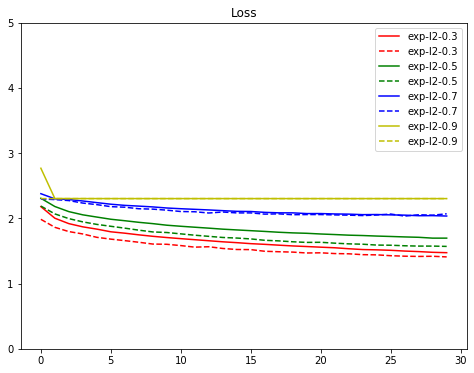

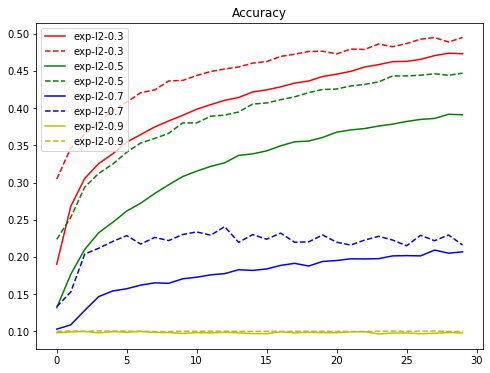

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [7]:
# using Adam as optimizer for training

results = {} # for plotting later
for dp_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ration = %.6f" % (dp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = dp_ratio)
    # model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(dp_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ration = 0.300000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 368us/step - loss: 2.0871 - acc: 0.2248 - val_loss: 1.8492 - val_acc: 0.3437
Epoch 2/30
50000/50000 [==============================] - 15s 300us/step - loss: 1.9141 - acc: 0.3010 - val_loss: 1.8060 - val_acc: 0.3606
Epoch 3/30
50000/50000 [==============================] - 15s 301us/step - loss: 1.8745 - acc: 0.3141 - val_loss: 1.7976 - val_acc: 0.3474
Epoch 4/30
50000/50000 [==============================] - 15s 295us/step - loss: 1.8320 - acc: 0.3322 - val_loss: 1.7331 - val_acc: 0.3825
Epoch 5/30
50000/50000 [==============================] - 15s 290us/step - loss: 1.7987 - acc: 0.3428 - val_loss: 1.7054 - val_acc: 0.3936
Epoch 6/30
50000/50000 [==============================] - 15s 292us/step - loss: 1.7720 - acc: 0.3567 - val_loss: 1.6775 - val_acc: 0.3974
Epoch 7/30
50000/50000 [==============================] - 15s 293us/step -

50000/50000 [==============================] - 14s 274us/step - loss: 1.9218 - acc: 0.2767 - val_loss: 1.9273 - val_acc: 0.3121
Epoch 29/30
50000/50000 [==============================] - 14s 275us/step - loss: 1.9251 - acc: 0.2749 - val_loss: 1.9304 - val_acc: 0.3036
Epoch 30/30
50000/50000 [==============================] - 15s 298us/step - loss: 1.9229 - acc: 0.2765 - val_loss: 1.9698 - val_acc: 0.2945
Experiment with Dropout ration = 0.700000
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 289us/step - loss: 2.3509 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/30
50000/50000 [==============================] - 14s 280us/step - loss: 2.3027 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/30
50000/50000 [==============================] - 14s 282us/step - loss: 2.3029 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/30
50000/50000 [==============================] - 14s 282us/step - loss: 2.

 1024/50000 [..............................] - ETA: 33s - loss: 2.3027 - acc: 0.0967

/Users/vincent/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171364). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 15s 298us/step - loss: 2.3027 - acc: 0.0960 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 26/30
50000/50000 [==============================] - 14s 285us/step - loss: 2.3027 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 27/30
50000/50000 [==============================] - 14s 286us/step - loss: 2.3027 - acc: 0.0993 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 28/30
50000/50000 [==============================] - 14s 285us/step - loss: 2.3027 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 29/30
50000/50000 [==============================] - 14s 285us/step - loss: 2.3027 - acc: 0.0991 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 30/30
50000/50000 [==============================] - 14s 289us/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000


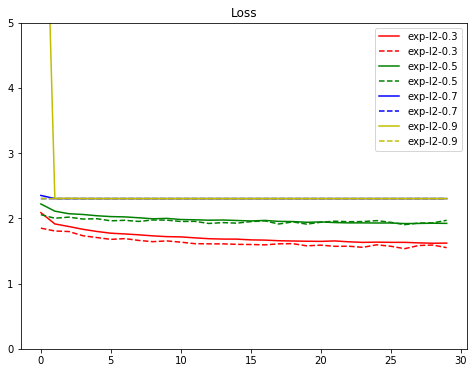

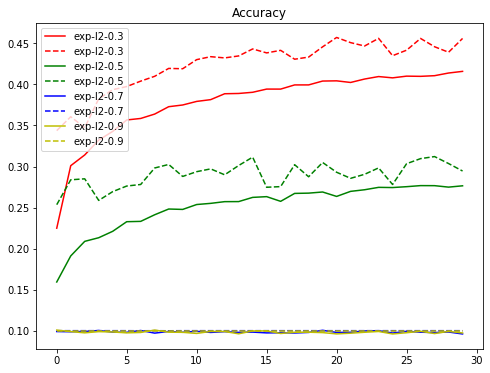

In [8]:
# plotting
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()